### **lightning ai 4 cpu 기반**
- ### **한글깨짐 방지**

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,875 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and dire

### **재 시작**

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import gzip
import pickle
import os

# 현재 디렉토리를 확인합니다.
current_dir = '/content/drive/MyDrive/이대과제/data_gzip'

# 파일 리스트를 가져옵니다.
file_list = [f for f in os.listdir(current_dir) if f.endswith('.pkl.gz')]

# 빈 데이터프레임 리스트를 생성합니다.
df_list = []

# 각 gzip 파일을 읽어 데이터프레임으로 변환하고 리스트에 추가합니다.
for file in file_list:
    try:
        with gzip.open(os.path.join(current_dir, file), 'rb') as f:
            data = pickle.load(f)
            df = pd.DataFrame(data)
            if not df.empty:
                df_list.append(df)
            else:
                print(f"Empty DataFrame in file: {file}")
    except Exception as e:
        print(f"Error reading file {file}: {e}")

# 빈 리스트가 아닌지 확인합니다.
if df_list:
    # 모든 데이터프레임을 하나로 합칩니다.
    df = pd.concat(df_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

### test

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import gzip
import pickle
import os

In [3]:
path = '/content/drive/MyDrive/이대과제/data_gzip/chunk_11.pkl.gz'
with gzip.open(path, 'rb') as f:
    data = pickle.load(f)
    df = pd.DataFrame(data)

print(df.shape)

(357002, 8)


In [4]:
# 동일 기사 삭제
df = df[~df.duplicated(['일자', '언론사', '제목'])]

# Function to extract text after '>'
def extract_text_after_symbol(text, symbol='>'):
    if isinstance(text, str):
        return text.split(symbol)[-1]
    return text

# Applying the function to each column using applymap
df[['통합 분류1', '통합 분류2', '통합 분류3']] = df[['통합 분류1', '통합 분류2', '통합 분류3']].applymap(lambda x: extract_text_after_symbol(x))

# 지역 구분
region = ['서울', '경기', '인천', '경북', '대구', '경남', '부산', '울산', '충남', '충북', '대전',
          '전북', '전남', '광주', '강원', '제주', ]

# sample데이터에서 region에 해당하는 값이 처음으로 나오는 데이터값만  갖는 새로운컬럼
df['지역'] = df.apply(lambda x: x['통합 분류1'] if x['통합 분류1'] in region else (x['통합 분류2'] ##
                                                                                  if x['통합 분류2'] in region else (x['통합 분류3'] ##
                                                                                                                 if x['통합 분류3'] in region else np.nan)), axis=1)
# 지역이 있는 행만 선택
df.dropna(subset=['지역'], inplace=True)

# 필요컬럼만 추출
df= df[['일자', '특성추출(가중치순 상위 50개)', '지역']]

# df['일자']를 날짜로 변경하고 index로 지정
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
df['년도']=df['일자'].apply(lambda x: x.year)
df['월']=df['일자'].apply(lambda x: x.month)

df

,일자,특성추출(가중치순 상위 50개),지역,년도,월
31,2010-01-01,"결식아동,이틀간,겨울방학,위문품,1인,태백소방,119사랑,20kg,회원들,사랑나눔회...",강원,2010,1
131,2010-01-01,"선도기업,부산시,부산,교류회,업종별,인증서,실국장,지원시책,파급력,내년도,일본어,산학연",부산,2010,1
291,2010-01-01,"부산,동광동,일본,왜관,원도심,동구,용두산,일본인,광복동,일본어,한국,동관,왜색풍,...",부산,2010,1
311,2010-01-02,"수협,남해안,경남,냉동굴,시범급식,국방부,굴수하식수협,통영,엄철규,저장성,장병들,장...",경남,2010,1
391,2010-01-03,"영광군,금호,호소문,금호그룹,영공노,지역경제,채권단,공무원노동조합,사회부,협력회사,...",울산,2010,1
...,...,...,...,...,...
7139791,2024-05-21,"완도군,이마트,특산물,활성화,한국전복생산자완도군협회,쇼핑몰,구슬땀,전남,박람회",충남,2024,5
7139851,2024-05-21,"펫티켓,코리안독스,포메종,학생들,용인,용인시,4학년,말티푸,미견,신나희,학부모,담당...",대전,2024,5
7139911,2024-05-21,"경기공유학교,반도체,지자체,지역사회,전문가,도교육청,파주,공유학교,대학교수,글로컬,...",충남,2024,5
7139971,2024-05-21,"시행계획,교육부,대교협,대변인,내년도,학년도,의대생,부총리,천재지변,40곳",강원,2024,5


### **1. 지역별 년도별 검색어**

<Axes: >

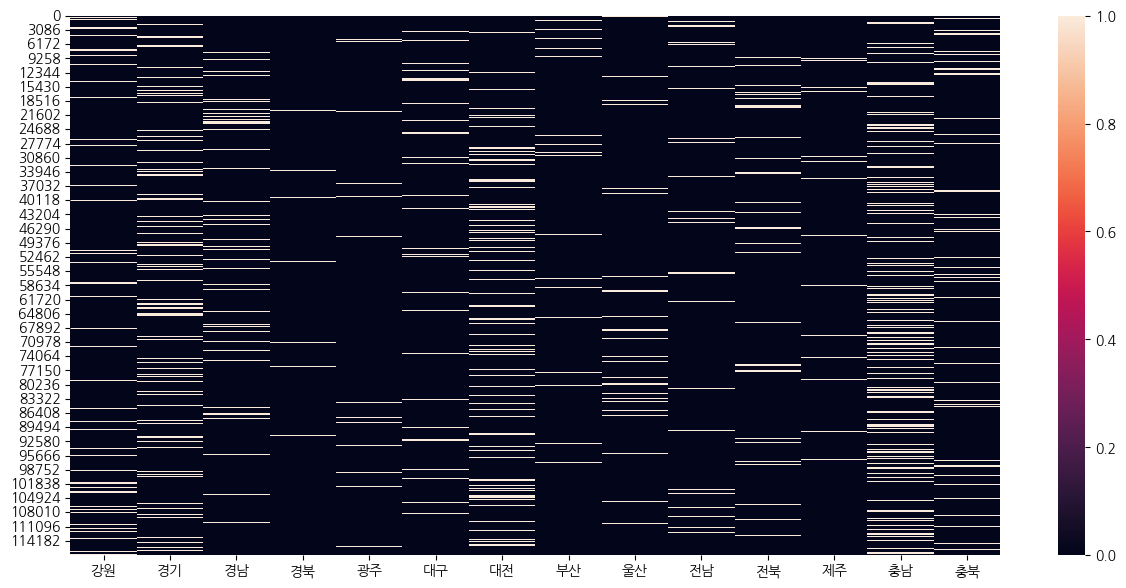

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corpus = []
for text in df['지역']:
    corpus.append(text)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

data = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
plt.figure(figsize=(15, 7))
sns.heatmap(data)

<Axes: xlabel='년도', ylabel='지역'>

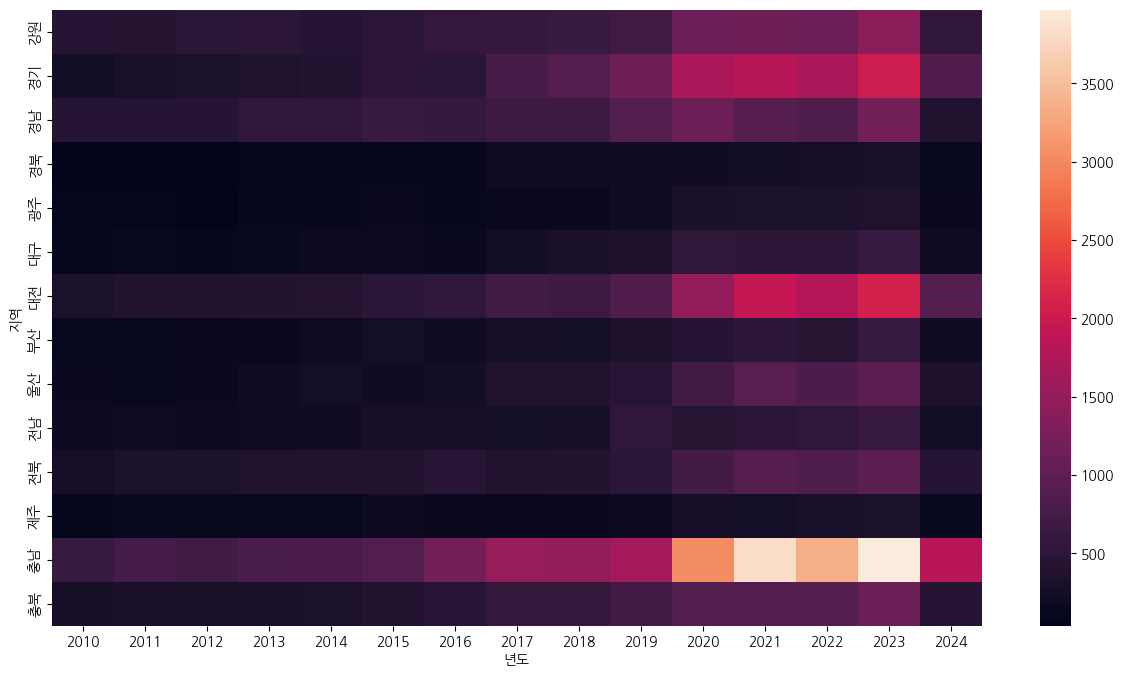

In [6]:

# Create a pivot table with year as columns and region as rows
pivot_table = pd.pivot_table(df, index='지역', columns='년도', values='특성추출(가중치순 상위 50개)', aggfunc='count')

# Print the pivot table
# Set the figure size
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table)

In [7]:
# df['일자']를 날짜로 변경하고 index로 지정
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
df['년도']=df['일자'].apply(lambda x: x.year)
df['월']=df['일자'].apply(lambda x: x.month)
df.head()

,일자,특성추출(가중치순 상위 50개),지역,년도,월
31,2010-01-01,"결식아동,이틀간,겨울방학,위문품,1인,태백소방,119사랑,20kg,회원들,사랑나눔회...",강원,2010,1
131,2010-01-01,"선도기업,부산시,부산,교류회,업종별,인증서,실국장,지원시책,파급력,내년도,일본어,산학연",부산,2010,1
291,2010-01-01,"부산,동광동,일본,왜관,원도심,동구,용두산,일본인,광복동,일본어,한국,동관,왜색풍,...",부산,2010,1
311,2010-01-02,"수협,남해안,경남,냉동굴,시범급식,국방부,굴수하식수협,통영,엄철규,저장성,장병들,장...",경남,2010,1
391,2010-01-03,"영광군,금호,호소문,금호그룹,영공노,지역경제,채권단,공무원노동조합,사회부,협력회사,...",울산,2010,1


### **검색어 정리하기**

In [8]:
keywords_df = pd.read_excel('/content/drive/MyDrive/이대과제/차수별 키워드(30개).xlsx').iloc[:31, ::2].iloc[1:, :]
for col in keywords_df:
    keywords_df[col] = keywords_df[col].str.replace(r'^\d+\.\s*', '', regex=True)

keywords_df

,제1차 어린이식생활안전관리 종합계획 (2010~2012),제2차 어린이식생활안전관리 종합계획 (2013~2015),제3차 어린이식생활안전관리 종합계획 (2016~2018),제4차 어린이식생활안전관리 종합계획 (2019~2021),제5차 어린이식생활안전관리 종합계획 (2022~2024),제6차 어린이식생활안전관리 종합계획 수립 추진계획 (2025~2027)
1,안전한 식품,식품안전보호구역,고카페인 식품,식품안전,기호식품,기호식품
2,바른 영양,기호식품,알레르기 표시,기호식품,단체급식,단체급식
3,건강한 어린이,단체급식,광고 제한,단체급식,저염식품,영양표시
4,기호식품,영양표시,급식관리지원센터,저염식품,저당식품,고열량 식품
5,단체급식,식생활교육,저당음료,알레르기 식품,알레르기,자율협약
6,영양교육,협력강화,영양교육,영양교육,스마트 급식관리,빅데이터
7,식품표시,지자체 지원,나트륨 저감화,빅데이터,빅데이터,영양교육
8,HACCP,예방관리,영양표시 개선,광고 관리,광고 제한,안전관리
9,식중독 예방,식품안전성,식품안전성,안전관리,온라인 환경,식품안전법
10,품질관리,위생수준,급식위생,영양표시,맞춤형 지원,식중독 예방


In [9]:
# 데이터프레임을 원하는 구조로 변경
melted_df = keywords_df.melt(var_name="계획", value_name="내용")
# 계획 컬럼에서 계획 번호만 추출
melted_df["계획"] = melted_df["계획"].str.extract(r'(제\d차)')
# 컬럼 이름 변경 및 순서 변경
result_df = melted_df.rename(columns={"내용": "컬럼1", "계획": "컬럼2"})[['컬럼1', '컬럼2']]
result_df.columns = ['검색어', '계획']
# 추가 검색어 from 이대
search_words = ['당류', '나트륨', '어린이기호식품', '아동청소년 식품구입', '스쿨존', '학원주변',
                '우수판매업소', '건강먹거리코너', '지속가능한 식생활', '어린이급식관리지원센터', '튼튼버스']
extra_df = pd.DataFrame(search_words, columns=['검색어']); extra_df['계획'] = '추가'
final_df = pd.concat([result_df, extra_df]).reset_index(drop=True)
# final_df의 검색어 컬럼의 각 단어는 space로 분리하여 다른 행으로 만들기
final_df = final_df.assign(검색어=final_df['검색어'].str.split(' ')).explode('검색어')
final_df.to_excel('차수별검색어_추가검색어_20240611.xlsx', index=False)
final_df

,검색어,계획
0,안전한,제1차
0,식품,제1차
1,바른,제1차
1,영양,제1차
2,건강한,제1차
...,...,...
187,건강먹거리코너,추가
188,지속가능한,추가
188,식생활,추가
189,어린이급식관리지원센터,추가


### 불용어는 필요없을 것임 검색어만 보면 되니까~

## **1. 지역 및 연도별 키워드 검색어 출현빈도 분석**
- 전체 검색어로 지역별 년도별 추이
- 시작년도, 끝년도 지정

In [10]:
# 검색어 리스트
columns_as_lists = final_df['검색어'].tolist()
print('. '.join(columns_as_lists))

# 지역 구분
region = ['서울', '경기', '인천', '경북', '대구', '경남', '부산', '울산', '충남', '충북', '대전',
          '전북', '전남', '광주', '강원', '제주', ]

안전한. 식품. 바른. 영양. 건강한. 어린이. 기호식품. 단체급식. 영양교육. 식품표시. HACCP. 식중독. 예방. 품질관리. 학교. 급식. 식습관. 식품안전보호구역. 저염식. 저당식. 영양성분. 위생관리. 캠페인. 식품안전법. 정부. 협력. 소비자. 참여. 우수식품. 고열량. 저영양. 위생교육. 식품안전지수. 결식아동. 알레르기. 학교. 주변. 건강. 식생활. 온라인. 식품. 식품안전보호구역. 기호식품. 단체급식. 영양표시. 식생활교육. 협력강화. 지자체. 지원. 예방관리. 식품안전성. 위생수준. 급식. 위생. 학교급식. 고열량식품. 저영양식품. 품질인증. 식품광고. 정책. 추진. 식생활. 지침. 영양교육. 확대. 온라인. 식품판매. 지역사회. 협력. 식품위생법. 급식기준. 나트륨. 저감화. 당류. 저감화. 영양관리. 고카페인. 학부모. 교육. 건강. 식습관. 체험교육. 고카페인. 식품. 알레르기. 표시. 광고. 제한. 급식관리지원센터. 저당음료. 영양교육. 나트륨. 저감화. 영양표시. 개선. 식품안전성. 급식위생. 학교급식. 품질관리. 식생활. 교육. 건강한. 식습관. 식품안전법. 지자체. 협력. 어린이. 보호구역. 온라인. 식품판매. 데이터. 수집. 소비자. 참여. 영양성분. 영양표시. 식품안전지수. 결식아동. 영양성분. 표시. 위생관리. 교육. 콘텐츠. 건강. 식생활. 학교주변. 식생활. 개선. 식품안전. 기호식품. 단체급식. 저염식품. 알레르기. 식품. 영양교육. 빅데이터. 광고. 관리. 안전관리. 영양표시. 식품안전법. 품질인증. 어린이. 보호구역. 식중독. 예방. 식습관. 개선. 식품안전보호구역. 학교. 급식. 지자체. 협력. 식품산업. 데이터. 수집. 정책. 추진. 식생활지침. 나트륨. 저감화. 당류. 저감화. 온라인. 식품판매. 영양관리. 영양성분. 학부모. 교육. 건강. 식습관. 체험교육. 기호식품. 단체급식. 저염식품. 저당식품. 알레르기. 스마트. 급식관리. 빅데이터. 광고. 제한. 온라인. 환경. 맞춤형. 지원. 식품안전성. 영양성분

### test용

In [11]:
tf = df.groupby(['지역'])
region = []
for i, _ in tf.groups.items():
    region.append(i)

#### **지역별로 검색어를 년도순서로 muliti index한 후 데이터프레임으로 저장**

In [12]:
from  tqdm import tqdm
import numpy as np

# Your main processing loop
result_dict = {}
for keyword in tqdm(columns_as_lists[:5]):
    for terra in region:
        start_year = 2010
        end_year = 2024
        result_df1 = pd.DataFrame()

        sf = tf.get_group(terra)

        keyword_list = columns_as_lists[:5]
        for year in range(start_year, end_year + 1):
            start_date = str(year) + "-01-01"
            end_date = str(year) + "-12-31"
            st_index = (sf['일자'] >= start_date) & (sf['일자'] <= end_date)
            temp_sf = sf[st_index]

            corpus_yearly = []
            for keywords in temp_sf['특성추출(가중치순 상위 50개)']:
                corpus_yearly.append(keywords)

            cleaned_corpus_yearly = " ".join(corpus_yearly)  # Simplified corpus cleaning
            result_list = [cleaned_corpus_yearly.count(k) for k in keyword_list]

            temp_df = pd.DataFrame(result_list, index=keyword_list, columns=[str(year)])
            result_df1 = pd.concat([result_df1, temp_df], axis=1)

        result_df1.index = keyword_list
        result_dict[f'{terra}_{keyword}'] = result_df1

# Create the desired format
multi_index_data = []
for key, df in result_dict.items():
    region_name, keyword = key.split('_')
    for idx, row in df.iterrows():
        for col, value in row.items():
            multi_index_data.append([region_name, keyword, f"{col}년", value])

# Ensure all years are covered for each Region and Keyword
all_years = [f"{year}년" for year in range(2010, 2025)]
complete_data = []

for terra in region:
    for keyword in columns_as_lists[:10]:
        for year in all_years:
            found = False
            for record in multi_index_data:
                if record[0] == terra and record[1] == keyword and record[2] == year:
                    complete_data.append(record)
                    found = True
                    break
            if not found:
                complete_data.append([terra, keyword, year, 0])


multi_index_df = pd.DataFrame(complete_data, columns=['Region', 'Keyword', 'Year', 'Value'])
multi_index_df.set_index(['Region', 'Keyword', 'Year'], inplace=True)

# Display the final DataFrame
multi_index_df.to_excel('multi_index_검색어_지역_년도.xlsx', index=False)

region = [i for i, _ in tf.groups.items()]

multi_index_df

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Value
Region Keyword Year        
강원     안전한     2010년      0
               2011년      0
               2012년      0
               2013년      1
               2014년      0
...                     ...
충북     식품표시    2020년      0
               2021년      0
               2022년      0
               2023년      0
               2024년      0

[2100 rows x 1 columns]

In [13]:
multi_index_df.unstack()

Value                                                        \
Year           2010년 2011년 2012년 2013년 2014년 2015년 2016년 2017년 2018년 2019년   
Region Keyword                                                               
강원     건강한         0     0     0     1     0     0     0     0     0     0   
       기호식품        0     0     0     0     0     0     0     0     0     0   
       단체급식        0     0     0     0     0     0     0     0     0     0   
       바른          0     0     0     1     0     0     0     0     0     0   
       식품          0     0     0     1     0     0     0     0     0     0   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
충북     식품표시        0     0     0     0     0     0     0     0     0     0   
       안전한         0     0     0     0     0     0     0     0     0     0   
       어린이         0     0     0     0     0     0     0     0     0     0   
       영양          0     0     0     0     0     0     0     0     0     0   
       영양교육        0     0     0     0     0     0     0     0     0     0   

                                              
Year           2020년 2021년 2022년 2023년 2024년  
Region Keyword                                
강원     건강한         0     0     0     0     0  
       기호식품        0     0     0     0     0  
       단체급식        0     0     0     0     0  
       바른          0     0     0     0     0  
       식품          0     0     0     0     0  
...              ...   ...   ...   ...   ...  
충북     식품표시        0     0     0     0     0  
       안전한         0     0     0     0     0  
       어린이         0     0     0     0     0  
       영양          0     0     0     0     0  
       영양교육        0     0     0     0     0  

[140 rows x 15 columns]

In [ ]:
# multi index도 저장
multi_index_df.to_excel('longtype_multi_index_검색어_지역_년도.xlsx')
multi_index_df.unstack().to_excel('widetype_multi_index_검색어_지역_년도.xlsx')

### **검색어로 등고선(년도와 지역) 보기**
- **일기예보와 시각화가 동일**
- **지역별로 검색어의 출현빈도 평균이나 분포가 다른가 t-test, F-test를 하지 않음**

In [16]:
tf['Region'] = df_second_format['Region'].where(tf['Region'] != df_second_format['Region'].shift())
tf

NameError: name 'df_second_format' is not defined

### **등고선 그래프를 그리기 위해 데이터 변형**

,Region,Keyword,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,강원,건강한,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,NaN,기호식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,단체급식,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,바른,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,NaN,식품,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,NaN,식품표시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
136,NaN,안전한,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
137,NaN,어린이,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
138,NaN,영양,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


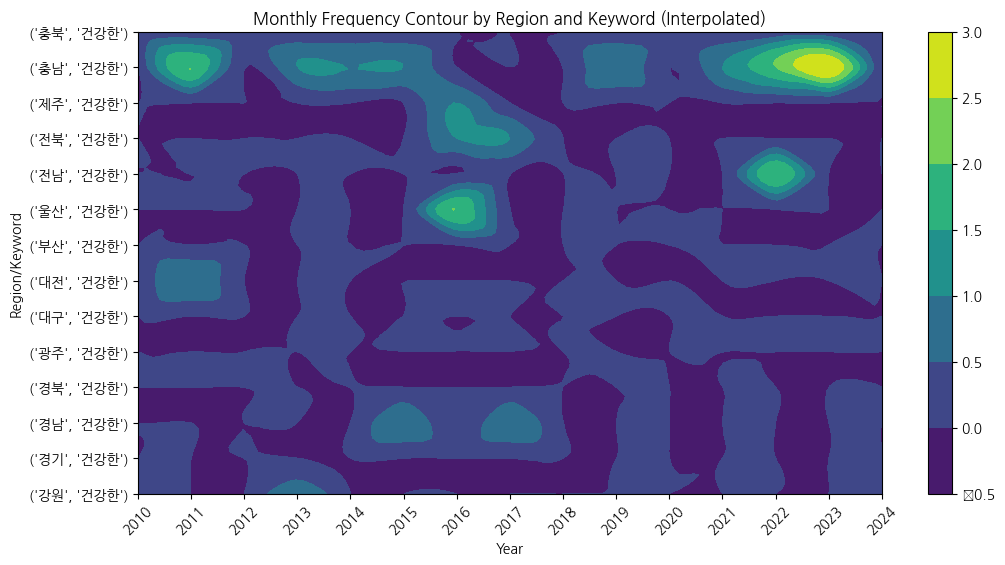

In [ ]:
tf = multi_index_df.unstack().reset_index()
tf.columns = temp.columns.map(str)
tf['Region'] = df_second_format['Region'].where(tf['Region'] != df_second_format['Region'].shift())

display(tf)

# Melt the DataFrame to have years as a separate column
temp_melted = tf.melt(id_vars=['Region', 'Keyword'], var_name='Year', value_name='Value')

# Pivot the DataFrame to create a matrix suitable for contour plot
temp_pivot = temp_melted.pivot_table(index=['Region', 'Keyword'], columns='Year', values='Value', fill_value=0)

# Interpolating the data for smoother contours
xi = np.linspace(0, len(df_pivot.columns) - 1, 100)
yi = np.linspace(0, len(df_pivot.index) - 1, 100)
XI, YI = np.meshgrid(xi, yi)

# Flatten the data for interpolation
x = np.arange(len(df_pivot.columns))
y = np.arange(len(df_pivot.index))
X, Y = np.meshgrid(x, y)
Z = df_pivot.values

# Interpolate the data
ZI = griddata((X.flatten(), Y.flatten()), Z.flatten(), (XI, YI), method='cubic')

# Generate the contour plot with interpolation
fig, ax = plt.subplots(figsize=(12, 6))

# Create the contour plot
contour = ax.contourf(XI, YI, ZI, cmap='viridis')
fig.colorbar(contour)

# Set the labels
ax.set_xticks(np.linspace(0, len(df_pivot.columns) - 1, len(df_pivot.columns)))
ax.set_xticklabels(df_pivot.columns, rotation=45)
ax.set_yticks(np.linspace(0, len(df_pivot.index) - 1, len(df_pivot.index)))
ax.set_yticklabels(df_pivot.index)
ax.set_xlabel('Year')
ax.set_ylabel('Region/Keyword')
ax.set_title('Monthly Frequency Contour by Region and Keyword (Interpolated)')

plt.show()

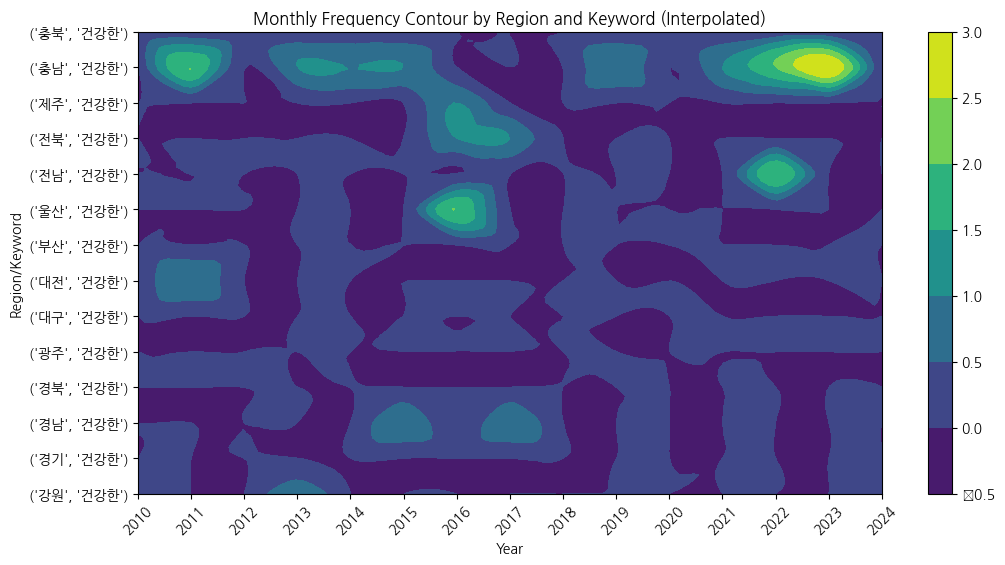

In [ ]:
from scipy.interpolate import griddata

# Interpolating the data for smoother contours
xi = np.linspace(0, len(df_pivot.columns) - 1, 100)
yi = np.linspace(0, len(df_pivot.index) - 1, 100)
XI, YI = np.meshgrid(xi, yi)

# Flatten the data for interpolation
x = np.arange(len(df_pivot.columns))
y = np.arange(len(df_pivot.index))
X, Y = np.meshgrid(x, y)
Z = df_pivot.values

# Interpolate the data
ZI = griddata((X.flatten(), Y.flatten()), Z.flatten(), (XI, YI), method='cubic')

# Generate the contour plot with interpolation
fig, ax = plt.subplots(figsize=(12, 6))

# Create the contour plot
contour = ax.contourf(XI, YI, ZI, cmap='viridis')
fig.colorbar(contour)

# Set the labels
ax.set_xticks(np.linspace(0, len(df_pivot.columns) - 1, len(df_pivot.columns)))
ax.set_xticklabels(df_pivot.columns, rotation=45)
ax.set_yticks(np.linspace(0, len(df_pivot.index) - 1, len(df_pivot.index)))
ax.set_yticklabels(df_pivot.index)
ax.set_xlabel('Year')
ax.set_ylabel('Region/Keyword')
ax.set_title('Monthly Frequency Contour by Region and Keyword (Interpolated)')

plt.show()


## **3. 종합계획 차수별 년도별 검색어 출현빈도**
### **corpus정제 사용자함수**

In [ ]:
# corpus 정제
import re

def preprocess_corpus(corpus):
    updated_corpus = []
    pattern_mixed = re.compile(r'(?=.*\d)(?=.*[a-zA-Z가-힣])')
    pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')

    for document in corpus:
        if isinstance(document, str):
            words = document.split(',')
            filtered_words = [word for word in words if pattern_korean_english.match(word) and not pattern_mixed.search(word)]
            updated_corpus.append(','.join(filtered_words))
        else:
            updated_corpus.append('')
    return updated_corpus

In [ ]:
## 검색어 뽑기
keywords_df = pd.read_excel('/content/drive/MyDrive/이대과제/차수별 키워드(30개).xlsx').iloc[:31, ::2].iloc[1:, :]
for col in keywords_df:
    keywords_df[col] = keywords_df[col].str.replace(r'^\d+\.\s*', '', regex=True)
# Convert each column to a list
columns_as_lists = {col.split('어린이')[0].strip(): keywords_df[col].to_list() for col in keywords_df}
columns_as_lists.keys()

dict_keys(['제1차', '제2차', '제3차', '제4차', '제5차', '제6차'])

In [ ]:
from collections import defaultdict
from tqdm import tqdm_notebook
result_dict = defaultdict(dict)

plans = list(columns_as_lists.keys())
# plans --> ['제1차', '제2차', '제3차', '제4차', '제5차', '제6차']
# 년도별로 반복
for key in tqdm_notebook(plans):
    # 시작년도, 끝년도 지정
    start_year = 2010
    end_year = 2024
    num = 500

    result_df = pd.DataFrame()

    # 관심주제어를 매년 키워드로 해서
    keyword_list = columns_as_lists[key]

    # 녇도별 문서 추출 후 키워드 빈도수 분석
    result_df1 = pd.DataFrame()

    # 년도에 해당되는 출현빈도
    for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
        print(f'{key} 어린이식생활안전관리 종합계획 {year}년도 데이터 처리중......')
        start_date = str(year) + "-01-01"
        end_date = str(year) + "-12-31"
        dt_index = (df['일자'] >= start_date) & (df['일자'] <= end_date)
        temp_df = df[dt_index]


        corpus_yearly = []
        for keywords in temp_df['특성추출(가중치순 상위 50개)']:
            corpus_yearly.append(keywords)

        # 각 년도별 corpus 정제
        cleaned_corpus_yearly = preprocess_corpus(corpus_yearly)

        s_corpus_str = "".join(cleaned_corpus_yearly)

        result_list = []

        for k in keyword_list:
            result_list.append(s_corpus_str.count(k))

        temp_df = pd.DataFrame(result_list,columns=[str(year)])
        result_df1 = pd.concat([result_df1,temp_df], axis=1)

    result_df1.index =  keyword_list

    display(result_df1)

    result_df1.to_excel(f'{key}' +'종합계획_키워드 추이' + '.xlsx')
    result_dict[key] = result_df1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

제1차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
바른 영양,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
건강한 어린이,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
영양교육,9,20,16,10,14,22,34,40,34,26,35,32,26,44,17
식품표시,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0
HACCP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
식중독 예방,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
품질관리,26,20,28,25,18,27,35,35,26,22,43,37,29,42,18


  0%|          | 0/15 [00:00<?, ?it/s]

제2차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
식품안전보호구역,8,3,8,11,4,5,5,5,1,3,1,7,2,2,4
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
영양표시,2,1,3,0,4,1,0,0,0,1,1,2,1,3,0
식생활교육,4,3,4,9,7,9,19,14,17,18,23,24,29,17,3
협력강화,1,1,3,1,1,4,3,4,1,4,4,0,0,3,0
지자체 지원,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
예방관리,6,7,4,16,10,10,18,31,22,27,25,10,21,22,11
식품안전성,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0
위생수준,4,5,5,7,3,7,7,7,6,11,2,1,4,6,0


  0%|          | 0/15 [00:00<?, ?it/s]

제3차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
고카페인 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
알레르기 표시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
광고 제한,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
급식관리지원센터,0,10,10,23,25,53,40,44,62,68,52,54,50,85,28
저당음료,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
영양교육,9,20,16,10,14,22,34,40,34,26,35,32,26,44,17
나트륨 저감화,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
영양표시 개선,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
식품안전성,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0
급식위생,2,2,7,0,0,7,7,4,1,0,3,0,4,2,1


  0%|          | 0/15 [00:00<?, ?it/s]

제4차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
식품안전,28,31,22,32,30,42,47,67,54,65,47,46,44,61,30
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
저염식품,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
알레르기 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
영양교육,9,20,16,10,14,22,34,40,34,26,35,32,26,44,17
빅데이터,0,0,3,7,34,54,76,140,132,175,259,280,242,230,85
광고 관리,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
안전관리,60,62,61,104,125,106,131,136,147,175,217,208,277,289,128
영양표시,2,1,3,0,4,1,0,0,0,1,1,2,1,3,0


  0%|          | 0/15 [00:00<?, ?it/s]

제5차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
저염식품,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
저당식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
알레르기,3,3,11,9,11,6,5,9,8,11,4,7,14,7,8
스마트 급식관리,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
빅데이터,0,0,3,7,34,54,76,140,132,175,259,280,242,230,85
광고 제한,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
온라인 환경,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
맞춤형 지원,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


  0%|          | 0/15 [00:00<?, ?it/s]

제6차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
영양표시,2,1,3,0,4,1,0,0,0,1,1,2,1,3,0
고열량 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
자율협약,1,0,0,2,0,0,3,2,0,1,0,0,0,0,0
빅데이터,0,0,3,7,34,54,76,140,132,175,259,280,242,230,85
영양교육,9,20,16,10,14,22,34,40,34,26,35,32,26,44,17
안전관리,60,62,61,104,125,106,131,136,147,175,217,208,277,289,128
식품안전법,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
식중독 예방,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
